In [1]:
import math
import random
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np

----------------- DATA -----------------

In [2]:
main_data = [(0, 0), (837, 958), (862, 958), (888, 958), (913, 958), (939, 958), (964, 958), (989, 958), (1010, 958),
             (1040, 958), (1070, 958), (1090, 958), (1120, 958), (1140, 958), (1170, 958), (1170, 1110), (1140, 1110),
             (1120, 1110), (1090, 1110), (1070, 1110), (1040, 1110), (1010, 1110), (989, 1110), (964, 1110),
             (939, 1110),
             (913, 1110), (888, 1110), (862, 1110), (837, 1110), (837, 1190), (862, 1190), (888, 1190), (913, 1190),
             (939, 1190), (964, 1190), (989, 1190), (1010, 1190), (1040, 1190), (1070, 1190), (1090, 1190),
             (1120, 1190),
             (1140, 1190), (1170, 1190), (1170, 1340), (1140, 1340), (1120, 1340), (1090, 1340), (1070, 1340),
             (1040, 1340), (1010, 1340), (989, 1340), (964, 1340), (939, 1340), (913, 1340), (888, 1340), (862, 1340),
             (837, 1340), (837, 1420), (862, 1420), (888, 1420), (913, 1420), (939, 1420), (964, 1420), (989, 1420),
             (1010, 1420), (1040, 1420), (1070, 1420), (1090, 1420), (1120, 1420), (1140, 1420), (1170, 1420),
             (1170, 1570), (1140, 1570), (1120, 1570), (1090, 1570), (1070, 1570), (1040, 1570), (1010, 1570),
             (989, 1570),
             (964, 1570), (939, 1570), (913, 1570), (888, 1570), (862, 1570), (837, 1570), (837, 1640), (862, 1640),
             (888, 1640), (913, 1640), (939, 1640), (964, 1640), (989, 1640), (1010, 1640), (1040, 1640), (1070, 1640),
             (1090, 1640), (1120, 1640), (1140, 1640), (1170, 1640), (1170, 1800), (1140, 1800), (1120, 1800),
             (1090, 1800), (1070, 1800), (1040, 1800), (1010, 1800), (989, 1800), (964, 1800), (939, 1800), (913, 1800),
             (888, 1800), (862, 1800), (837, 1800), (837, 1900), (862, 1900), (888, 1900), (913, 1900), (939, 1900),
             (964, 1900), (989, 1900), (1010, 1900), (1040, 1900), (1070, 1900), (1090, 1900), (1120, 1900),
             (1140, 1900),
             (1170, 1900), (1170, 2050), (1140, 2050), (1120, 2050), (1090, 2050), (1070, 2050), (1040, 2050),
             (1010, 2050), (989, 2050), (964, 2050), (939, 2050), (913, 2050), (888, 2050), (862, 2050), (837, 2050),
             (837, 2130), (862, 2130), (888, 2130), (913, 2130), (939, 2130), (964, 2130), (989, 2130), (1010, 2130),
             (1040, 2130), (1070, 2130), (1090, 2130), (1120, 2130), (1140, 2130), (1170, 2130), (1170, 2280),
             (1140, 2280), (1120, 2280), (1090, 2280), (1070, 2280), (1040, 2280), (1010, 2280), (989, 2280),
             (964, 2280),
             (939, 2280), (913, 2280), (888, 2280), (862, 2280), (837, 2280), (837, 2360), (862, 2360), (888, 2360),
             (913, 2360), (939, 2360), (964, 2360), (989, 2360), (1010, 2360), (1040, 2360), (1070, 2360), (1090, 2360),
             (1120, 2360), (1140, 2360), (1170, 2360), (1170, 2510), (1140, 2510), (1120, 2510), (1090, 2510),
             (1070, 2510), (1040, 2510), (1010, 2510), (989, 2510), (964, 2510), (939, 2510), (913, 2510), (888, 2510),
             (862, 2510), (837, 2510), (837, 2580), (862, 2580), (888, 2580), (913, 2580), (939, 2580), (964, 2580),
             (989, 2580), (1010, 2580), (1040, 2580), (1070, 2580), (1090, 2580), (1120, 2580), (1140, 2580),
             (1170, 2580),
             (1240, 2580), (1170, 2740), (1140, 2740), (1120, 2740), (1090, 2740), (1070, 2740), (1040, 2740),
             (1010, 2740), (989, 2740), (964, 2740), (939, 2740), (913, 2740), (888, 2740), (862, 2740), (837, 2740),
             (964, 2890), (1040, 2890), (1140, 2890), (1220, 2890), (1220, 2910), (1140, 2910), (1040, 2910),
             (964, 2910),
             (913, 2910), (964, 2940), (1040, 2940), (1140, 2940), (1220, 2940), (1220, 2960), (1140, 2960),
             (1040, 2960),
             (964, 2960), (913, 2960), (964, 2990), (1040, 2990), (1140, 2990), (1220, 2990), (1220, 3020),
             (1140, 3020),
             (1040, 3020), (964, 3020), (964, 3040), (1040, 3040), (1140, 3040), (1220, 3040), (1220, 3070),
             (1140, 3070),
             (1040, 3070), (964, 3070), (1300, 875), (1320, 875), (1350, 875), (1370, 875), (1400, 875), (1420, 875),
             (1450, 875), (1470, 875), (1500, 875), (1520, 875), (1550, 875), (1570, 875), (1600, 875), (1620, 875),
             (1650, 875), (1670, 875), (1700, 875), (1720, 875), (1750, 875), (1770, 875), (1800, 875), (1820, 875),
             (1850, 875), (1870, 875), (1900, 875), (1920, 875), (1950, 875), (1970, 875), (2000, 875), (2020, 875),
             (2050, 875), (2070, 875), (2100, 875), (2120, 875), (2150, 875), (2170, 875), (2200, 875), (2250, 875),
             (1300, 900), (1350, 900), (1400, 900), (1450, 900), (1500, 900), (1550, 900), (1600, 900), (1650, 900),
             (1700, 900), (1750, 900), (1800, 900), (1850, 900), (1900, 900), (1950, 900), (2000, 900), (2050, 900),
             (2100, 900), (2150, 900), (2200, 900), (2250, 900), (2300, 900), (2350, 900), (2400, 900), (2450, 900),
             (2500, 900), (2550, 900), (2600, 900), (2650, 900), (2700, 900), (2750, 900), (2800, 900), (2850, 900),
             (2900, 900), (2950, 900), (3000, 900), (3050, 900), (3100, 900), (3150, 900), (3200, 900), (3250, 900),
             (3300, 900), (3350, 900), (3400, 900), (3450, 900), (3420, 925), (3370, 925), (3320, 925), (3270, 925),
             (3220, 925), (3170, 925), (3120, 925), (3070, 925), (3020, 925), (2970, 925), (2920, 925), (2870, 925),
             (2820, 925), (2770, 925), (2720, 925), (2670, 925), (2620, 925), (2570, 925), (2450, 925), (2400, 925),
             (2350, 925), (2300, 925), (2170, 925), (2120, 925), (2070, 925), (2020, 925), (1970, 925), (1920, 925),
             (1870, 925), (1820, 925), (1770, 925), (1720, 925), (1670, 925), (1620, 925), (1570, 925), (1520, 925),
             (1470, 925), (1420, 925), (1370, 925), (1320, 925), (2300, 950), (2350, 950), (2400, 950), (2450, 950),
             (2680, 996), (2200, 996), (1520, 1090), (1400, 1110), (1470, 1110), (1570, 1110), (1650, 1110),
             (2110, 1110),
             (2180, 1110), (2280, 1110), (2360, 1110), (2360, 1140), (2280, 1140), (2180, 1140), (2110, 1140),
             (2010, 1140), (1930, 1140), (1830, 1140), (1750, 1140), (1650, 1140), (1570, 1140), (1520, 1140),
             (1470, 1140), (1400, 1140), (1400, 1160), (1470, 1160), (1570, 1160), (1650, 1160), (1750, 1160),
             (1830, 1160), (1930, 1160), (2010, 1160), (2110, 1160), (2180, 1160), (2280, 1160), (2360, 1160),
             (2870, 1190), (2820, 1190), (2770, 1190), (2720, 1190), (2360, 1190), (2280, 1190), (2180, 1190),
             (2110, 1190), (2010, 1190), (1930, 1190), (1830, 1190), (1750, 1190), (1650, 1190), (1570, 1190),
             (1470, 1190), (1400, 1190), (1400, 1210), (1470, 1210), (1570, 1210), (1650, 1210), (1750, 1210),
             (1830, 1210), (1930, 1210), (2010, 1210), (2110, 1210), (2180, 1210), (2280, 1210), (2360, 1210),
             (2360, 1240), (2280, 1240), (2180, 1240), (2110, 1240), (2010, 1240), (1930, 1240), (1830, 1240),
             (1750, 1240), (1650, 1240), (1570, 1240), (1470, 1240), (1400, 1240), (1400, 1260), (1470, 1260),
             (1570, 1260), (1650, 1260), (1750, 1260), (1830, 1260), (1930, 1260), (2010, 1260), (2110, 1260),
             (2180, 1260), (2280, 1260), (2360, 1260), (2440, 1260), (2510, 1260), (2360, 1290), (2280, 1290),
             (2180, 1290), (2110, 1290), (2010, 1290), (1930, 1290), (1830, 1290), (1750, 1290), (1650, 1290),
             (1570, 1290), (1470, 1290), (1400, 1290), (2440, 1310), (2510, 1310), (2740, 1310), (2770, 1310),
             (2840, 1310), (2870, 1310), (2870, 1360), (2820, 1360), (2770, 1360), (2720, 1360), (1850, 1360),
             (1750, 1360), (1850, 1390), (1750, 1390), (1650, 1390), (1570, 1390), (1470, 1390), (1400, 1390),
             (1400, 1420), (1470, 1420), (1570, 1420), (1650, 1420), (1750, 1420), (1850, 1420), (1930, 1420),
             (2010, 1420), (2110, 1420), (2180, 1420), (2280, 1420), (2360, 1420), (2460, 1420), (2540, 1420),
             (2540, 1440), (2460, 1440), (2360, 1440), (2280, 1440), (2180, 1440), (2110, 1440), (2010, 1440),
             (1930, 1440), (1850, 1440), (1750, 1440), (1650, 1440), (1570, 1440), (1470, 1440), (1400, 1440),
             (1400, 1470), (1470, 1470), (1570, 1470), (1650, 1470), (1750, 1470), (1850, 1470), (1930, 1470),
             (2010, 1470), (2110, 1470), (2180, 1470), (2280, 1470), (2360, 1470), (2460, 1470), (2540, 1470),
             (2870, 1490), (2840, 1490), (2770, 1490), (2740, 1490), (2540, 1490), (2460, 1490), (2360, 1490),
             (2280, 1490), (2180, 1490), (2110, 1490), (2010, 1490), (1930, 1490), (1850, 1490), (1750, 1490),
             (1650, 1490), (1570, 1490), (1470, 1490), (1400, 1490), (1400, 1520), (1470, 1520), (1570, 1520),
             (1650, 1520), (1930, 1520), (2010, 1520), (2110, 1520), (2180, 1520), (2280, 1520), (2360, 1520),
             (2460, 1520), (2540, 1520), (2540, 1540), (2460, 1540), (2360, 1540), (2280, 1540), (2180, 1540),
             (2110, 1540), (2010, 1540), (1930, 1540), (1650, 1540), (1570, 1540), (1470, 1540), (1400, 1540),
             (1400, 1570), (1470, 1570), (1570, 1570), (1650, 1570), (1930, 1570), (2010, 1570), (2110, 1570),
             (2180, 1570), (2280, 1570), (2360, 1570), (2460, 1570), (2540, 1570), (2540, 1690), (2460, 1690),
             (2180, 1690), (2110, 1690), (1650, 1690), (1570, 1690), (1470, 1690), (1400, 1690), (1400, 1720),
             (1470, 1720), (1570, 1720), (1650, 1720), (1930, 1720), (2010, 1720), (2110, 1720), (2180, 1720),
             (2280, 1720), (2360, 1720), (2460, 1720), (2540, 1720), (2640, 1720), (2720, 1720), (3960, 1750),
             (3890, 1750), (3830, 1750), (3760, 1750), (3710, 1750), (3630, 1750), (3580, 1750), (3500, 1750),
             (3450, 1750), (3380, 1750), (3330, 1750), (3250, 1750), (3200, 1750), (3120, 1750), (3070, 1750),
             (3000, 1750), (2890, 1750), (2720, 1750), (2640, 1750), (2540, 1750), (2460, 1750), (2360, 1750),
             (2280, 1750), (2180, 1750), (2110, 1750), (2010, 1750), (1930, 1750), (1650, 1750), (1570, 1750),
             (1470, 1750), (1400, 1750), (1400, 1770), (1470, 1770), (1570, 1770), (1650, 1770), (1930, 1770),
             (2010, 1770), (2110, 1770), (2180, 1770), (2280, 1770), (2360, 1770), (2460, 1770), (2540, 1770),
             (2640, 1770), (2720, 1770), (3960, 1800), (3890, 1800), (3830, 1800), (3760, 1800), (3710, 1800),
             (3630, 1800), (3580, 1800), (3500, 1800), (3450, 1800), (3380, 1800), (3330, 1800), (3250, 1800),
             (3200, 1800), (3120, 1800), (3070, 1800), (3000, 1800), (2890, 1800), (2720, 1800), (2640, 1800),
             (2540, 1800), (2460, 1800), (2360, 1800), (2280, 1800), (2180, 1800), (2110, 1800), (2010, 1800),
             (1930, 1800), (1650, 1800), (1570, 1800), (1470, 1800), (1400, 1800), (1400, 1820), (1470, 1820),
             (1570, 1820), (1650, 1820), (1930, 1820), (2010, 1820), (2110, 1820), (2180, 1820), (2280, 1820),
             (2360, 1820), (2460, 1820), (2540, 1820), (2640, 1820), (2720, 1820), (2960, 1820), (3960, 1850),
             (3890, 1850), (3830, 1850), (3760, 1850), (3710, 1850), (3630, 1850), (3580, 1850), (3500, 1850),
             (3450, 1850), (3380, 1850), (3330, 1850), (3250, 1850), (3200, 1850), (3120, 1850), (3070, 1850),
             (3000, 1850), (2820, 1850), (2720, 1850), (2640, 1850), (2540, 1850), (2460, 1850), (2360, 1850),
             (2280, 1850), (2180, 1850), (2110, 1850), (2010, 1850), (1930, 1850), (1650, 1850), (1570, 1850),
             (1470, 1850), (1400, 1850), (1400, 1870), (1470, 1870), (1570, 1870), (1650, 1870), (1930, 1870),
             (2010, 1870), (2110, 1870), (2180, 1870), (2280, 1870), (2360, 1870), (2460, 1870), (2540, 1870),
             (2640, 1870), (2720, 1870), (2890, 1910), (2870, 1920), (2960, 1920), (3000, 1920), (3070, 1920),
             (3120, 1920), (3200, 1920), (3250, 1920), (3330, 1920), (3380, 1920), (3450, 1920), (3500, 1920),
             (3580, 1920), (3630, 1920), (3710, 1920), (3760, 1920), (3830, 1920), (3890, 1920), (3960, 1920),
             (2890, 1940), (2820, 1950), (3070, 1960), (2540, 1970), (2640, 1970), (2720, 1970), (3760, 1970),
             (3150, 2000), (3000, 2000), (2920, 2000), (2840, 2000), (2720, 2000), (2640, 2000), (2280, 2000),
             (2130, 2000), (2030, 2000), (1880, 2000), (1760, 2000), (1690, 2000), (1550, 2000), (1400, 2000),
             (1400, 2030), (1550, 2030), (1690, 2030), (1760, 2030), (1880, 2030), (2030, 2030), (2130, 2030),
             (2280, 2030), (2540, 2030), (2640, 2030), (2720, 2030), (2840, 2030), (2920, 2030), (3150, 2050),
             (3000, 2050), (2920, 2050), (2840, 2050), (2720, 2050), (2640, 2050), (2280, 2050), (2130, 2050),
             (2030, 2050), (1880, 2050), (1760, 2050), (1690, 2050), (1550, 2050), (1400, 2050), (1400, 2080),
             (1550, 2080), (1690, 2080), (1760, 2080), (1880, 2080), (2030, 2080), (2130, 2080), (2280, 2080),
             (3760, 2080), (3070, 2090), (2540, 2100), (2460, 2100), (2280, 2100), (2130, 2100), (2030, 2100),
             (1880, 2100), (1760, 2100), (1690, 2100), (1550, 2100), (1400, 2100), (1400, 2130), (1550, 2130),
             (1690, 2130), (1760, 2130), (1880, 2130), (2030, 2130), (2130, 2130), (2280, 2130), (2460, 2130),
             (2540, 2130), (2640, 2130), (2720, 2130), (3070, 2130), (3120, 2130), (3760, 2130), (3680, 2150),
             (3630, 2150), (2720, 2150), (2640, 2150), (2540, 2150), (2460, 2150), (2280, 2150), (2130, 2150),
             (2030, 2150), (1880, 2150), (1760, 2150), (1690, 2150), (1550, 2150), (1400, 2150), (1400, 2180),
             (1550, 2180), (1880, 2180), (2030, 2180), (2130, 2180), (2280, 2180), (2460, 2180), (2540, 2180),
             (2640, 2180), (2720, 2180), (2720, 2200), (2640, 2200), (2540, 2200), (2460, 2200), (2280, 2200),
             (2130, 2200), (2030, 2200), (1880, 2200), (1550, 2200), (1400, 2200), (1400, 2230), (1550, 2230),
             (1880, 2230), (2030, 2230), (2130, 2230), (2280, 2230), (2460, 2230), (2540, 2230), (2640, 2230),
             (2720, 2230), (3760, 2250), (3120, 2250), (3070, 2250), (2720, 2250), (2640, 2250), (2540, 2250),
             (2460, 2250), (2280, 2250), (2130, 2250), (2030, 2250), (1880, 2250), (1550, 2250), (1400, 2250),
             (1400, 2280), (1550, 2280), (1880, 2280), (2030, 2280), (2130, 2280), (2280, 2280), (2460, 2280),
             (2540, 2280), (2640, 2280), (2720, 2280), (3660, 2280), (3680, 2280), (2720, 2300), (2640, 2300),
             (2540, 2300), (2460, 2300), (2280, 2300), (2130, 2300), (2030, 2300), (1880, 2300), (1750, 2300),
             (1680, 2300), (1550, 2300), (1400, 2300), (1400, 2330), (1550, 2330), (1680, 2330), (1750, 2330),
             (1880, 2330), (2030, 2330), (2130, 2330), (2280, 2330), (2460, 2330), (2540, 2330), (2640, 2330),
             (2720, 2330), (3760, 2360), (2280, 2360), (2130, 2360), (2030, 2360), (1880, 2360), (1750, 2360),
             (1680, 2360), (1550, 2360), (1400, 2360), (1400, 2380), (1550, 2380), (1680, 2380), (1750, 2380),
             (1880, 2380), (2030, 2380), (2130, 2380), (2280, 2380), (2280, 2410), (2130, 2410), (2030, 2410),
             (1880, 2410), (1750, 2410), (1680, 2410), (1550, 2410), (1400, 2410), (1320, 2420), (1400, 2430),
             (1550, 2430), (1680, 2430), (1750, 2430), (1880, 2430), (2030, 2430), (2130, 2430), (2280, 2430),
             (2640, 2430), (2720, 2430), (3760, 2460), (2720, 2460), (2640, 2460), (2280, 2460), (2130, 2460),
             (2030, 2460), (1880, 2460), (1750, 2460), (1680, 2460), (1550, 2460), (1400, 2460), (1320, 2470),
             (1400, 2480), (1550, 2480), (1680, 2480), (1750, 2480), (1880, 2480), (2030, 2480), (2130, 2480),
             (2280, 2480), (2640, 2480), (2720, 2480), (2640, 2510), (2720, 2510), (3760, 2510), (2720, 2530),
             (2640, 2530), (2640, 2560), (2720, 2560), (2640, 2580), (2720, 2580), (3630, 2580), (3680, 2580),
             (2720, 2610), (2640, 2610), (3760, 2630), (2870, 2630), (2720, 2630), (2640, 2630), (2280, 2630),
             (2130, 2630), (2030, 2630), (1880, 2630), (1800, 2630), (1650, 2630), (1550, 2630), (1400, 2630),
             (1400, 2660), (1550, 2660), (1650, 2660), (1800, 2660), (1880, 2660), (2030, 2660), (2130, 2660),
             (2280, 2660), (2640, 2660), (2720, 2660), (2280, 2690), (2130, 2690), (2030, 2690), (1880, 2690),
             (1800, 2690), (1650, 2690), (1550, 2690), (1400, 2690), (1240, 2690), (1400, 2710), (1550, 2710),
             (1650, 2710), (1800, 2710), (1880, 2710), (2030, 2710), (2130, 2710), (2280, 2710), (3660, 2710),
             (3680, 2710), (2870, 2740), (2540, 2740), (2460, 2740), (2280, 2740), (2130, 2740), (2030, 2740),
             (1880, 2740), (1800, 2740), (1650, 2740), (1550, 2740), (1400, 2740), (1400, 2760), (1550, 2760),
             (1650, 2760), (1800, 2760), (1880, 2760), (2030, 2760), (2130, 2760), (2280, 2760), (2460, 2760),
             (2540, 2760), (2720, 2790), (2640, 2790), (2540, 2790), (2460, 2790), (2280, 2790), (2130, 2790),
             (2030, 2790), (1880, 2790), (1800, 2790), (1650, 2790), (1550, 2790), (1400, 2790), (1400, 2810),
             (1550, 2810), (1650, 2810), (1800, 2810), (1880, 2810), (2030, 2810), (2130, 2810), (2280, 2810),
             (2460, 2810), (2540, 2810), (2640, 2810), (2720, 2810), (3450, 2840), (3350, 2840), (2720, 2840),
             (2640, 2840), (2540, 2840), (2460, 2840), (2280, 2840), (2130, 2840), (2030, 2840), (1880, 2840),
             (1800, 2840), (1650, 2840), (1550, 2840), (1400, 2840), (1400, 2860), (1550, 2860), (1650, 2860),
             (1800, 2860), (1880, 2860), (2030, 2860), (2130, 2860), (2280, 2860), (2460, 2860), (2540, 2860),
             (2640, 2860), (2720, 2860), (2870, 2890), (2820, 2890), (2720, 2890), (2640, 2890), (2540, 2890),
             (2460, 2890), (2280, 2890), (2130, 2890), (2030, 2890), (1880, 2890), (1800, 2890), (1650, 2890),
             (1550, 2890), (1400, 2890), (1320, 2900), (1290, 2900), (1270, 2900), (1400, 2910), (1550, 2910),
             (1650, 2910), (1800, 2910), (1880, 2910), (2030, 2910), (2130, 2910), (2280, 2910), (2460, 2910),
             (2540, 2910), (2640, 2910), (2720, 2910), (2720, 2940), (2640, 2940), (2540, 2940), (2460, 2940),
             (2280, 2940), (2130, 2940), (2030, 2940), (1880, 2940), (1800, 2940), (1650, 2940), (1550, 2940),
             (1400, 2940), (1400, 2960), (1550, 2960), (1650, 2960), (1800, 2960), (1880, 2960), (2030, 2960),
             (2130, 2960), (2280, 2960), (2460, 2960), (2540, 2960), (2640, 2960), (2720, 2960), (3350, 2960),
             (3450, 2960), (2870, 2990), (2820, 2990), (3550, 3020), (3580, 3020), (3610, 3020), (3630, 3020),
             (3660, 3020), (3680, 3020), (3710, 3020), (3730, 3020), (3760, 3020), (3780, 3020), (3810, 3020),
             (3830, 3020), (3860, 3020), (3450, 3040), (3400, 3040), (3330, 3040), (3280, 3040), (1520, 3040),
             (1470, 3040), (3550, 3070), (3580, 3070), (3610, 3070), (3630, 3070), (3660, 3070), (3680, 3070),
             (3710, 3070), (3730, 3070), (3760, 3070), (3780, 3070), (3810, 3070), (3830, 3070), (3860, 3070),
             (2500, 875),
             (2550, 875), (2570, 875), (2600, 875), (2620, 875), (2650, 875), (2670, 875), (2700, 875), (2720, 875),
             (2750, 875), (2770, 875), (2800, 875), (2820, 875), (2850, 875), (2870, 875), (2900, 875), (2920, 875),
             (2950, 875), (2970, 875), (3000, 875), (3020, 875), (3050, 875), (3070, 875), (3100, 875), (3120, 875),
             (3150, 875), (3170, 875), (3200, 875), (3220, 875), (3250, 875), (3270, 875), (3300, 875), (3320, 875),
             (3350, 875), (3370, 875), (3400, 875), (3420, 875), (3450, 875), (3550, 908), (3580, 908), (3610, 908),
             (3630, 908), (3660, 908), (3680, 908), (3710, 908), (3730, 908), (3760, 908), (3780, 908), (3810, 908),
             (3830, 908), (3860, 908), (3860, 958), (3830, 958), (3810, 958), (3780, 958), (3760, 958), (3730, 958),
             (3710, 958), (3680, 958), (3660, 958), (3630, 958), (3610, 958), (3580, 958), (3550, 958)]

test_data = [(0, 0), (837, 958), (732, 500), (450, 400), (209, 500), (689, 183), (964, 781), (123, 394), (143, 888),
             (43, 321), (783, 102), (1000, 1000), (230, 230), (590, 10), (10, 600), (728, 123), (43, 543), (341, 854),
             (12, 912), (873, 291)]


def transform_data(dataset: list) -> dict:
    datadict = {}
    city_name = [i for i in range(len(dataset))]
    for city, coord in zip(city_name, dataset):
        datadict[city] = coord
    return datadict


Load the dataset you want executing ONLY 1 of the following boxes:

In [3]:
# Main dataset
data = transform_data(main_data)
print("Main dataset loaded")

Main dataset loaded


In [4]:
# Test dataset
#data = transform_data(test_data)
#print("Test dataset loaded")

----------------- DEBUG and PLOT functions -----------------

In [15]:
def show_results(solutions: list, attempts: list = None):
    def get_coordenates(route):
        return [data[key] for key in route]

    for i in range(len(solutions)):
        if attempts is None:
            print(
                f"Epoch: {i} --> "
                f"Fitness: {solutions[i].fitness} | "
                f"Route: {solutions[i].route}" )
        else:
            print(
                f"Epoch: {i} --> "
                f"Attempts: {attempts[i]} | "
                f"Fitness: {solutions[i].fitness} | "
                f"Route: {solutions[i].route}" )
        print("\t")
def show_best_result(solutions: list):
    print("-------------\nBest Result (lower fitness):")
    print(f"Fitness: {solutions[-1].fitness}")
    print(f"Route: {solutions[-1].route}" )


def plot_connections(data: list,
                     route: list):  # data son coordenadas y route son los indices de cada coordenada en orden (ruta)
    plt.figure()
    plt.scatter(*zip(*data), color='red', s=12)

    for i in range(1, len(route)):
        x1, y1 = data[route[i - 1]]
        x2, y2 = data[route[i]]
        x_values = [x1, x2]
        y_values = [y1, y2]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
        plt.text(x1 - 0.50, y1 + 0.50, route[i - 1])
        plt.text(x2 - 0.50, y2 + 0.50, route[i])

    plt.show()


def plot_fitness(solutions: list):
    plt.style.use('seaborn')
    fitness = [solution.fitness for solution in solutions]

    ax = plt.axes(xlim=(0, len(fitness)), ylim=(np.min(fitness) - 0.5, np.max(fitness) + 0.5))
    ax.set_title('Fitness Results', fontsize=18)
    ax.set_xlabel('Epochs', fontsize=16)
    ax.set_ylabel('Fitness', fontsize=16)
    ax.tick_params(labelsize=12)

    epochs = [i for i in range(len(solutions))]
    plt.plot(epochs, fitness)

    plt.show()


def plot_attempts(attempts: list):
    ax = plt.axes(xlim=(0, len(attempts)), ylim=(np.min(attempts) - 0.5, np.max(attempts) + 0.5))
    ax.set_title('Attempts Results', fontsize=18)
    ax.set_xlabel('Epochs', fontsize=16)
    ax.set_ylabel('Attempts', fontsize=16)
    ax.tick_params(labelsize=12)

    epochs = [i for i in range(len(attempts))]
    plt.plot(epochs, attempts)

    plt.show()

----------------- Solution -----------------

In [6]:
class Solution:
    def __init__(self, route: list):
        self.route = route
        self.fitness = self.__get_fitness()

    def __manhattan(self, p1, p2):
        return int(math.fabs(p1[0] - p2[0]) + math.fabs(p1[1] - p2[1]))

    def __get_fitness(self):
        fitness = 0
        for i in range(len(self.route) - 1):
            fitness += self.__manhattan(data[self.route[i]], data[self.route[i + 1]])

        fitness += self.__manhattan(data[self.route[-1]], data[self.route[0]])
        return fitness

----------------- Local Search Algorithm (used in the ILS) -----------------

In [7]:
class StochaticHillClimber:
    def __init__(self, patience_threshold: int):
        self.threshold = patience_threshold
        self.solutions = []
        self.fitness = []
        self.attempts = []

    def get_neighbor(self, sol):
        route = deepcopy(sol.route)

        # start from 1 to avoid changing the initial city
        i1 = random.randint(1, len(route) - 1)
        i2 = random.randint(1, len(route) - 1)

        # loop for avoiding to choose the same city
        while i2 == i1:
            i2 = random.randint(1, len(route) - 1)

        aux = route[i1]
        route[i1] = route[i2]
        route[i2] = aux

        return Solution(route)

    def fit(self, route: list):
        random.shuffle(route)
        s = Solution(route)
        self.solutions.append(s)
        self.fitness.append(s.fitness)
        self.attempts.append(0)
        attempts = 0

        while True:
            neighbor = self.get_neighbor(s)
            if neighbor.fitness <= s.fitness:  # <= because it is a minimization problem
                s = neighbor
                self.solutions.append(s)
                self.fitness.append(s.fitness)
                self.attempts.append(attempts)
                attempts = 0
            else:
                attempts += 1
                if attempts >= self.threshold:
                    break


----------------- Iterate Local Search (ILS) -----------------

In [8]:
class ILS:
    def __init__(self, algorithm, iterations: int):
        self.algorithm = algorithm
        self.iterations = iterations
        self.solutions = []

    def perturbation(self, sol):
        route = deepcopy(sol.route)

        def random_cities():
            cities = []
            for num in range(6):
                while True:
                    city = random.randint(1, len(route) - 1)
                    if city not in cities:
                        cities.append(city)
                        break
            return cities

        indexes = random_cities()
        # this kind of swap works only with ranges of even number
        for i in range(len(indexes)//2):
            # start from the beginning
            i1 = 0 + i

            # start from the end
            i2 = len(indexes) - 1 - i

            # swap
            aux = route[indexes[i1]]
            route[indexes[i1]] = route[indexes[i2]]
            route[indexes[i2]] = aux

        return Solution(route)

    def fit(self):
        # generate random solution
        route = [key for key in data.keys()]
        random.shuffle(route)
        s = Solution(route)
        self.solutions.append(s)

        for i in range(self.iterations):
            # run local search algorithm
            self.algorithm.fit(s.route)
            # takes the best solution founded
            s = self.algorithm.solutions[-1]
            self.solutions.append(s)
            # apply the perturbation
            s = self.perturbation(s)

        # sort by fitness descencing mode (minimization problem)
        self.solutions = sorted(self.solutions, key=lambda x: x.fitness, reverse=True)
        print('Finished Training')


Execute only the boxes corresponding to the dataset selected previously

----------------- EXECUTE ILS -----------------

In [9]:
ils = ILS(algorithm=StochaticHillClimber(patience_threshold=10), iterations=200)
ils.fit()

Finished Training


In [10]:
show_results(ils.solutions)

Epoch: 0 --> Fitness: 2220944 | Route: [222, 1284, 146, 499, 1124, 473, 877, 817, 1181, 894, 78, 161, 781, 1070, 516, 363, 369, 496, 582, 696, 573, 886, 765, 1046, 213, 615, 266, 493, 101, 848, 712, 632, 1045, 97, 1069, 494, 65, 1217, 1248, 226, 129, 865, 137, 649, 1093, 701, 523, 1183, 1030, 819, 469, 533, 770, 1254, 1159, 1286, 1261, 660, 277, 96, 974, 1104, 125, 1255, 420, 1077, 210, 907, 487, 145, 738, 1224, 127, 58, 10, 903, 577, 235, 1285, 371, 219, 888, 585, 1258, 829, 931, 697, 554, 87, 526, 1145, 670, 617, 570, 376, 925, 777, 437, 616, 1096, 1108, 196, 507, 433, 291, 1029, 650, 162, 1180, 102, 378, 716, 737, 1119, 882, 706, 677, 1012, 957, 360, 166, 492, 9, 1149, 413, 622, 1211, 452, 261, 253, 167, 999, 203, 998, 671, 1100, 643, 1214, 1226, 608, 247, 1189, 754, 1243, 243, 1128, 393, 860, 143, 479, 1078, 586, 271, 895, 787, 31, 1049, 490, 1112, 1200, 635, 187, 1039, 130, 1048, 1203, 333, 1170, 276, 857, 878, 503, 163, 372, 834, 13, 55, 939, 538, 1008, 332, 821, 972, 158, 910, 1

-------------
Best Result (lower fitness):
Fitness: 1721988
Route: [426, 993, 53, 26, 562, 1244, 544, 521, 232, 420, 82, 61, 491, 6, 4, 369, 1130, 837, 335, 681, 1067, 1106, 1051, 1087, 632, 356, 496, 1143, 774, 739, 113, 19, 309, 60, 818, 1017, 1235, 438, 298, 266, 152, 1124, 1223, 820, 1055, 162, 143, 46, 1258, 338, 414, 268, 1218, 861, 230, 215, 123, 645, 660, 527, 954, 1082, 1057, 205, 1249, 872, 1113, 777, 1137, 750, 794, 952, 1039, 235, 175, 97, 220, 114, 716, 910, 650, 138, 906, 1011, 1023, 722, 421, 206, 1203, 1195, 732, 1285, 314, 83, 1038, 1191, 396, 768, 928, 354, 255, 257, 325, 543, 513, 798, 352, 792, 1008, 502, 523, 1288, 290, 404, 470, 473, 552, 795, 935, 1116, 972, 969, 176, 1003, 849, 815, 340, 627, 965, 1064, 1159, 987, 651, 170, 1150, 243, 1086, 772, 429, 769, 678, 1216, 881, 1251, 453, 283, 802, 288, 5, 529, 364, 346, 840, 730, 351, 320, 1278, 497, 1256, 474, 44, 1000, 259, 866, 1019, 1048, 12, 457, 126, 807, 14, 370, 311, 586, 582, 834, 1032, 366, 380, 880, 981, 11

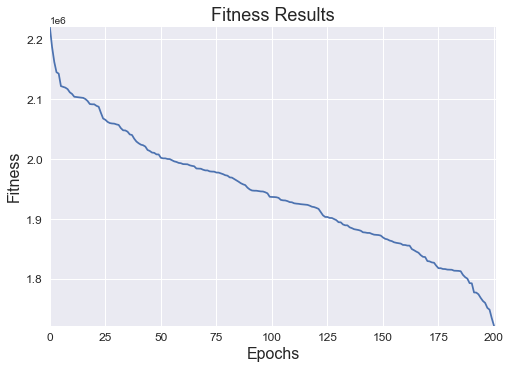

In [16]:
show_best_result(ils.solutions)
plot_fitness(ils.solutions)

In [12]:
# just use this function with the test dataset, the main one has too many points for trying on it and hardly understandable
#plot_connections(test_data, ils.solutions[-1].route)